In [2]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import codecs

In [3]:
db = sqlite3.connect('twisto_tweets.db')

In [4]:
data = db.execute("SELECT strftime('%m', time, 'unixepoch') as d, COUNT(date(time, 'unixepoch')) FROM tweets WHERE date(time, 'unixepoch') >= date('now','-10 months')GROUP BY d ORDER BY time ASC;").fetchall()
data = np.array(data)

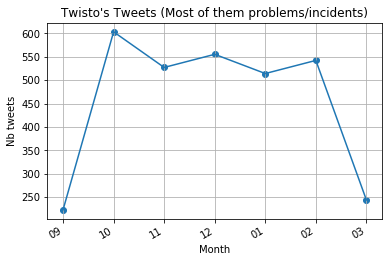

In [5]:
fig, ax = plt.subplots()
x, y = data[:, 0], data[:, 1].astype('float') 
ax.scatter(x,y)
ax.plot(x,y)

ax.set_title("Twisto's Tweets (Most of them problems/incidents)")
ax.set_xlabel('Month')
ax.set_ylabel('Nb tweets')
plt.grid()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.gcf().autofmt_xdate()
plt.show()

In [6]:
data_day = db.execute("SELECT strftime('%w', time, 'unixepoch') as d, COUNT(date(time, 'unixepoch')) FROM tweets GROUP BY d ORDER BY time ASC;").fetchall()
data_day = np.array(data_day).astype('object')
days = np.array(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
data_day[:,0] = days[data_day[:,0].astype('int')]

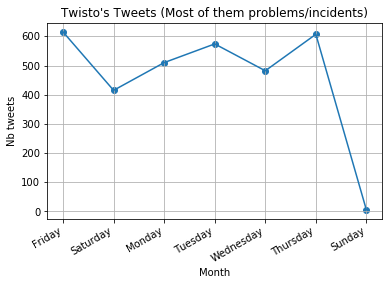

In [7]:
fig, ax = plt.subplots()
x, y = data_day[:, 0], data_day[:, 1].astype('float') 
ax.scatter(x,y)
ax.plot(x,y)

ax.set_title("Twisto's Tweets (Most of them problems/incidents)")
ax.set_xlabel('Month')
ax.set_ylabel('Nb tweets')
plt.grid()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.gcf().autofmt_xdate()
plt.show()
# L'info trafic du lundi au vendredi (7h/20h) et samedi (8h30/19h)

In [8]:
data = db.execute("SELECT time, text FROM tweets WHERE strftime('%w', time, 'unixepoch') LIKE '0'").fetchall() # Dimanche
data = np.array(data)

In [9]:
from datetime import datetime, timezone
for a in data[:, 0]:
    print(datetime.fromtimestamp(int(a), timezone.utc))

2019-11-24 15:27:39+00:00
2019-11-24 15:09:43+00:00
2019-11-24 14:37:28+00:00
2019-11-24 14:25:54+00:00
2019-11-24 13:48:03+00:00


In [10]:
data = db.execute("SELECT text FROM tweets").fetchall()
data = np.array(data)[:, 0]

In [11]:
test_line = data[0]

In [12]:
words = np.array(' '.join(data).split(' ')).astype("object")

In [13]:
counts = np.array(np.unique(words, return_counts=True))

In [14]:
a = counts[::, counts[1,].argsort()[::-1]]

In [15]:
with codecs.open("count.txt", 'w', 'utf8') as f:
    for i in a.T:
        f.write(f"{i[1]} : {i[0]}\n")

In [16]:
a.T

array([['de', 3733],
       ['à', 3569],
       ['#infotwisto', 2486],
       ...,
       ['Verts', 1],
       ['Vert,', 1],
       ['🙃...', 1]], dtype=object)

In [17]:
db.execute("SELECT COUNT(text), text FROM tweets WHERE text LIKE '%été%'").fetchall()

[(476,
  "#infotwisto L32 : en raison de la manifestation en centre-ville de Caen, les départ de 15h39 de Tour Leroy et 16h30 de Tourville S/Odon n'ont pas été effectués.")]

In [18]:
counts[::, counts[1,].argsort()[::-1]]

array([['de', 'à', '#infotwisto', ..., 'Verts', 'Vert,', '🙃...'],
       [3733, 3569, 2486, ..., 1, 1, 1]], dtype=object)